Start by importing the necessary python libraries first.

In [1]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

# Pretty display for notebooks
from IPython.display import display
#%matplotlib inline

# Import supplementary visualizations code visuals.py
import visuals as vs

C:\Users\mbonazzi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mbonazzi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\mbonazzi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and 

# 1 - Data exploration and Explanatory Visualization
All the data come from a single CSV file

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('DataTraffic.csv' , header=0)

# Display a sample of the dataset
display(data.head())

,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,...,day_3,day_2,day_1,day1,day2,day3,day4,day5,day6,day7
0,52853,88289,140176,185667,48302,105645,133907,36652,32513,93157,...,61479,76225,82847,62733,46565,94664,136253,174996,97844,192491
1,151131,149236,137697,139912,158485,146792,204547,168706,164609,167606,...,189758,134145,154835,134176,168013,178959,176188,216356,141062,182280
2,241397,192120,263546,184358,255854,268162,257058,281694,220768,180921,...,295253,282162,257564,204493,264524,286116,327571,358388,381477,380596
3,76906,66921,74916,73884,41280,11925,15012,102085,61817,83575,...,68298,14717,13350,69119,62640,70375,69535,62127,15027,23965
4,122469,133208,151764,201419,162264,164499,186101,139811,150813,158777,...,165170,201075,203543,180422,163283,142223,203050,178633,151058,199194


Display a statistical description of the dataset. 

In [3]:
# Display a description of the dataset
display(round(data.describe()))

,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,...,day_3,day_2,day_1,day1,day2,day3,day4,day5,day6,day7
count,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,...,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0,6188.0
mean,153154.0,154417.0,156712.0,156713.0,161948.0,175716.0,177512.0,152374.0,154166.0,155342.0,...,168706.0,180395.0,179432.0,167603.0,174213.0,177772.0,187724.0,205710.0,222251.0,227049.0
std,151320.0,151911.0,153448.0,152417.0,155417.0,164824.0,166653.0,147531.0,151003.0,151649.0,...,163693.0,174674.0,175606.0,167107.0,178205.0,181699.0,192477.0,220702.0,237434.0,239641.0
min,3.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,6.0,5.0,...,29.0,21.0,4.0,4.0,7.0,43.0,108.0,56.0,60.0,35.0
25%,53153.0,53962.0,55029.0,55230.0,58922.0,63668.0,62058.0,53176.0,53178.0,53690.0,...,59208.0,62206.0,59348.0,58728.0,60650.0,61307.0,65441.0,70563.0,75556.0,76761.0
50%,110398.0,111722.0,113858.0,115018.0,119324.0,131599.0,131592.0,110926.0,110000.0,112441.0,...,122684.0,132166.0,129630.0,120805.0,123936.0,126326.0,133914.0,145765.0,158101.0,161488.0
75%,201842.0,204186.0,208486.0,207333.0,214232.0,235367.0,241505.0,201977.0,204234.0,207241.0,...,222432.0,238347.0,240410.0,217306.0,227220.0,232781.0,245041.0,265310.0,287008.0,297318.0
max,1783540.0,1746000.0,1925939.0,1850955.0,1605738.0,1610997.0,1551683.0,1622043.0,1640963.0,1540862.0,...,1672846.0,1977385.0,2017473.0,2278117.0,2548852.0,2750852.0,2911176.0,4327079.0,4929722.0,4892331.0


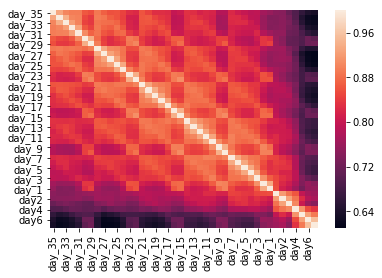

In [18]:
# data correlation graph
sns.heatmap(data.corr())

# 2 - Performance Metrics

As performance metrics we will use the Coefficient of Determination (or R2) and the Mean Square Error.

In [9]:
# Import 'r2_score' and 'mean_square_error' from sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 3 - Benchmark Model

As benchmark model I will use a simple Naive model that assume that the average week data traffic in the 7 days after the 4G installation will increase by 50% compared to the week before the installation

In [10]:
# Define the Naive model used as benchmark model
def Naive_model(data):
    
    # Extract last week of records
    naive_features = data[['day_1','day_2','day_3','day_4','day_5','day_6','day_7']]
    
    # Calculate the average and increase by 50%
    naive_prediction = pd.DataFrame()
    naive_prediction['mean'] = naive_features.mean(axis=1)*1.5
    
    return naive_prediction

In [19]:
# Calculate the prediction of the Naive Model
naive_prediction = Naive_model(data)
true_prediction = data[['day1','day2','day3','day4','day5','day6','day7']].mean(axis=1)

# Calculate the R2 score amd Mean Square Error of the Naive model
r2_naive = r2_score(true_prediction, naive_prediction, sample_weight=None, multioutput=None)
MSE_naive = mean_squared_error(true_prediction, naive_prediction, sample_weight=None, multioutput=None)


# Report the performance of the Naive model
print("Benchmark\n---------")
print("The Naive model has a R2 score of: {:.3f}, and a Mean Square Error of: {:,.3}".format(r2_naive,MSE_naive))

Benchmark
---------
The Naive model has a R2 score of: 0.518, and a Mean Square Error of: 1.72e+10


# 4 - Preprocessing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with.

First I split the data into features and target (or undependent and dependent vatriable). I calculate the target variable as the average of the data traffic in the 7 days following the installation the 4G

In [20]:
# Split the data into features and target label
features_raw = data.drop(['day1','day2','day3','day4','day5','day6','day7'], axis = 1)
target_raw = pd.DataFrame()
target_raw['WeekAvg'] = data[['day1','day2','day3','day4','day5','day6','day7']].mean(axis=1)
targets = pd.DataFrame()
targets['WeekAvg'] =data[['day1','day2','day3','day4','day5','day6','day7']].mean(axis=1)

# Display the features and target values
display(features_raw.head())
display(round(target_raw.head()))

,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
0,52853,88289,140176,185667,48302,105645,133907,36652,32513,93157,...,71548,70187,74519,84851,56083,50241,58172,61479,76225,82847
1,151131,149236,137697,139912,158485,146792,204547,168706,164609,167606,...,201630,212717,153572,164675,184146,171135,192642,189758,134145,154835
2,241397,192120,263546,184358,255854,268162,257058,281694,220768,180921,...,281263,301006,273402,309820,251000,247043,275858,295253,282162,257564
3,76906,66921,74916,73884,41280,11925,15012,102085,61817,83575,...,58438,15544,12709,68753,72453,58311,72382,68298,14717,13350
4,122469,133208,151764,201419,162264,164499,186101,139811,150813,158777,...,165427,173540,205815,144289,175807,185027,165408,165170,201075,203543


,WeekAvg
0,115078.0
1,171005.0
2,314738.0
3,53255.0
4,173980.0


Even if our dataset is already been cleaned (there are no invalid or missing entries), there are however some qualities that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms. 
In my dataset all the features and target variable have values that tend to lie near a single number, but they also have a non-trivial number of vastly larger values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.
I plotted below the histogram of the first two features ("day_30" and "day_29) as exmaple, but all the other features and target have a similar distibution shape.

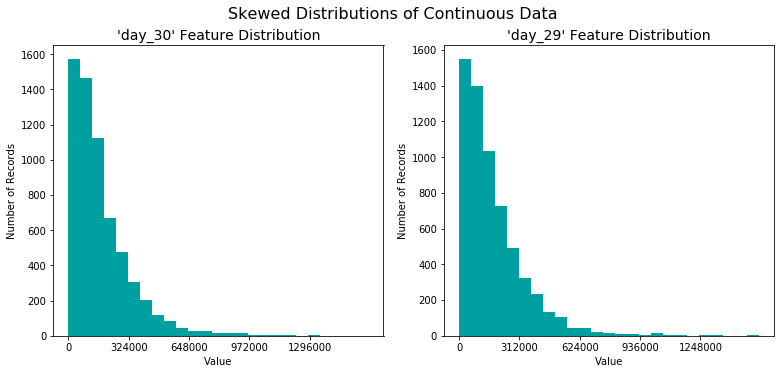

In [21]:
# Visualize skewed continuous features of original data
vs.distribution(data)

In the cell below I apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm, and plot the new distribution histogram

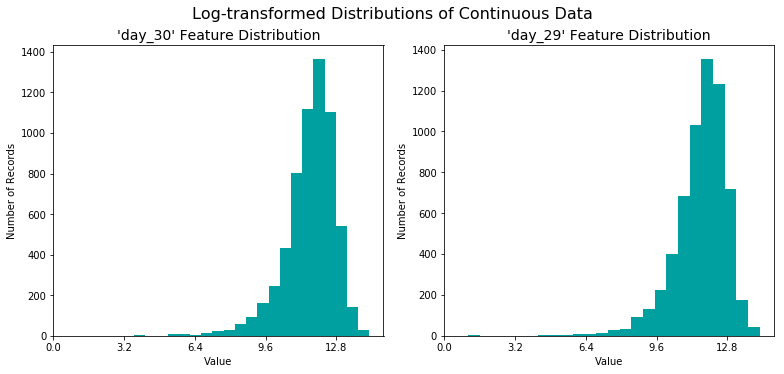

In [22]:
# Log-transform the skewed features and targets
headers_feature = features_raw.dtypes.index
#headers_target = target_raw.dtypes.index

features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[headers_feature] = features_raw[headers_feature].apply(lambda x: np.log(x + 1))

#target_log_transformed = pd.DataFrame(data = target_raw)
#target_log_transformed[headers_target] = target_raw[headers_target].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In addition to aplly the logarithmic trasformation, I also normalized the values of all features and target. 
It is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each variable's distribution; however, normalization ensures that each variable is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.
In the code cell below I normalize all the features and target, and display a sample of data. 

In [23]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features and targets
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[headers_feature] = scaler.fit_transform(features_log_transformed[headers_feature])

#target_log_minmax_transform = pd.DataFrame(data = target_log_transformed)
#target_log_minmax_transform[headers_target] = scaler.fit_transform(target_log_transformed[headers_target])


# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
#display(target_log_minmax_transform.head(n = 5))

,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
0,0.729484,0.770189,0.793341,0.823725,0.723664,0.785182,0.813781,0.706499,0.682863,0.774745,...,0.754101,0.730584,0.743998,0.764730,0.712878,0.706665,0.730782,0.697720,0.714557,0.752664
1,0.810252,0.810608,0.791934,0.802035,0.817371,0.811117,0.845982,0.824727,0.814033,0.821896,...,0.833891,0.819803,0.799984,0.816795,0.813181,0.807054,0.826109,0.800846,0.764111,0.801112
2,0.846253,0.830058,0.843133,0.823182,0.855144,0.858628,0.863351,0.864429,0.837773,0.828033,...,0.859525,0.847738,0.844640,0.866421,0.839311,0.837124,0.854694,0.841296,0.829300,0.840537
3,0.758318,0.748851,0.743927,0.753088,0.711275,0.613190,0.647454,0.785825,0.734826,0.766031,...,0.738514,0.609287,0.607059,0.748212,0.734485,0.718866,0.748181,0.707344,0.570370,0.611246
4,0.794086,0.801859,0.799605,0.829967,0.819229,0.820097,0.838799,0.810179,0.806954,0.817552,...,0.818650,0.803424,0.822654,0.806418,0.809271,0.813447,0.813975,0.788148,0.799597,0.822301


I will now split the data (both features and targets) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [24]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train_mean, y_test_mean = train_test_split(
                                                    features_log_minmax_transform,
                                                    targets,
                                                    #target_log_minmax_transform, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4950 samples.
Testing set has 1238 samples.


# 5 - Developing and Evaluating a Model

The code below produces four graphs for a Random Forest Regressor model with different maximum depths.Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased.
The model is scored on both the training and testing sets using R2, the coefficient of determination.

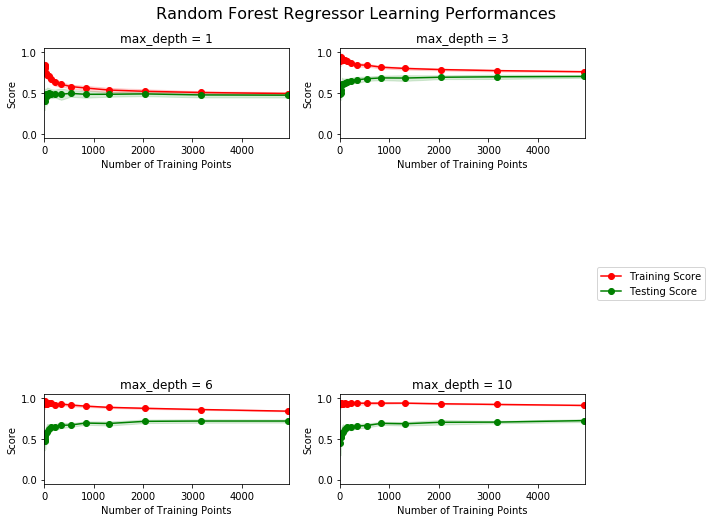

In [12]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features_raw, np.ravel(targets))

The following code cell produces a graph for a Random Forest Regressor model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the model is scored on both the training and validation sets using the coefficient of determination.

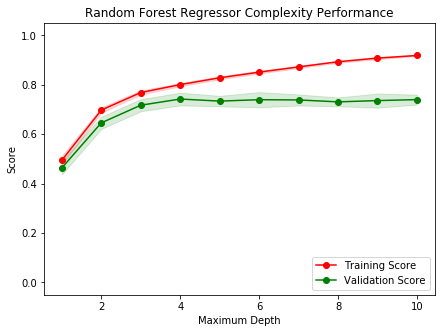

In [13]:
# Prodeuce a graph to show the Bias-Variance Tradeoff
vs.ModelComplexity(X_train, np.ravel(y_train_mean))

To properly evaluate the performance of different chosen models, I have created a training and predicting pipeline to quickly and effectively train the models using various sizes of training data and perform predictions on the testing data.

In the cell below I import the three supervised learning models that I consider could be appropriate to solve this problem, initialize the three models and store them in 'reg_A', 'reg_B', and 'reg_C'.
In this section I will use the default settings for each model, then I willtune one specific model in a later section.
I am training the models on the number of records equal to 1%, 10%, and 100% of the training data.

In [25]:
from time import time

# Create the fucntion used to rapidly train and test different models 
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])   
    end = time() # Get end time
        
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    results['pred_time'] = end - start
    
    # Compute r2_score on the train set
    results['R2_train'] = r2_score(y_train, predictions_train, sample_weight=None, multioutput=None)
    R2_train = r2_score(y_train, predictions_train, sample_weight=None, multioutput=None)
    
    # Compute r2_score on test set
    results['R2_test'] = r2_score(y_test, predictions_test, sample_weight=None, multioutput=None)
    R2_test = r2_score(y_test, predictions_test, sample_weight=None, multioutput=None)
    
    # Compute MSE on the the first 300 training samples
    results['MSE_train'] = mean_squared_error(y_train, predictions_train, sample_weight=None, multioutput=None)/10e+10
    MSE_train = mean_squared_error(y_train, predictions_train, sample_weight=None, multioutput=None)
    
    # Compute MSE on the test set
    results['MSE_test'] = mean_squared_error(y_test, predictions_test, sample_weight=None, multioutput=None)/10e+10
    MSE_test = mean_squared_error(y_test, predictions_test, sample_weight=None, multioutput=None)

    # Report the metrics for the model analized
    print("'\033[1m{:10s}\033[0m' model trained on {} samples, has the following performance \n------".format(learner.__class__.__name__, sample_size))
    print("| Training  subset | R2 score: {:.3f}, Mean Square error {:.3}\n".format(R2_train,MSE_train))
    print("| Testing   subset | R2 score: {:.3f}, Mean Square error {:.3}\n------".format(R2_test,MSE_test))
        
    # Return
    return results

'LinearRegression' model trained on 495 samples, has the following performance 
------
| Training  subset | R2 score: 0.387, Mean Square error 2.19e+10

| Testing   subset | R2 score: 0.427, Mean Square error 2.01e+10
------
'LinearRegression' model trained on 1485 samples, has the following performance 
------
| Training  subset | R2 score: 0.439, Mean Square error 2.01e+10

| Testing   subset | R2 score: 0.456, Mean Square error 1.91e+10
------
'LinearRegression' model trained on 4950 samples, has the following performance 
------
| Training  subset | R2 score: 0.450, Mean Square error 1.97e+10

| Testing   subset | R2 score: 0.464, Mean Square error 1.88e+10
------
'RandomForestRegressor' model trained on 495 samples, has the following performance 
------
| Training  subset | R2 score: 0.703, Mean Square error 1.06e+10

| Testing   subset | R2 score: 0.692, Mean Square error 1.08e+10
------
'RandomForestRegressor' model trained on 1485 samples, has the following performance 
------


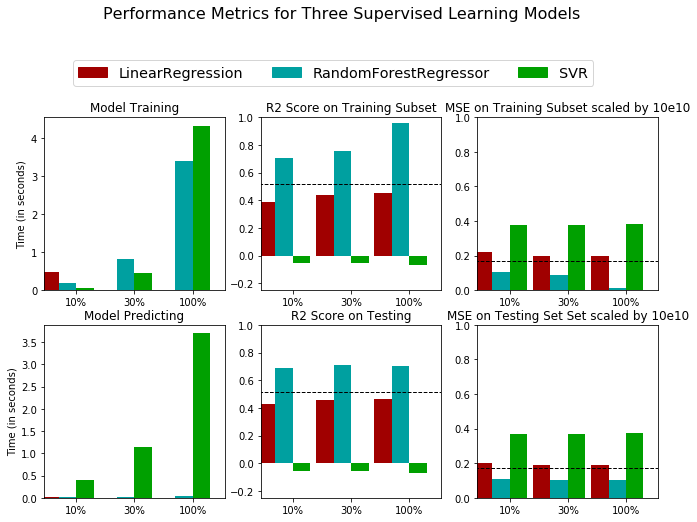

In [26]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Initialize the three models
reg_A = LinearRegression()
reg_B = RandomForestRegressor()
reg_C = SVR()

# Calculate the number of samples for 10%, 30%, and 100% of the training data
samples_100 = len(X_train)
samples_30 = int(float(len(X_train)) * 0.3)
samples_10 = int(float(len(X_train)) * 0.1)

# Collect results on the learners
results = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    results[reg_name] = {}
    for i, samples in enumerate([samples_10, samples_30, samples_100]):
        results[reg_name][i] = \
        train_predict(reg, samples, X_train, np.ravel(y_train_mean), X_test, y_test_mean)
        
vs.evaluate(results,r2_naive,MSE_naive/10e+10)

# 6 - Refinement

The Random Forest model seems to be the one that gaves us the best reults.
I will now use GridSearchCV to estimate the optimal parameters of the model to obtain the best performance. 

In [16]:
# Import 'GridSearchCV'
from sklearn.grid_search import GridSearchCV

# Initialize the classifier
reg = RandomForestRegressor(random_state=2)

# Create the parameters list that will be tuned
parameters = {
'n_estimators' : [75,100,125,150,175],
'max_depth' : [4,6,8,9,10,11]
}
              
# Perform grid search on the regressor 
grid_obj = GridSearchCV(reg, parameters)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, np.ravel(y_train_mean))

# Get the best estimator
best_reg = grid_fit.best_estimator_
                        
# Make predictions using the unoptimized and the best model
predictions = (reg.fit(X_train, np.ravel(y_train_mean))).predict(X_test)
best_predictions = best_reg.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R2 score on testing data: {:.3f} | Mean Square Error on testing data: {:.3}".format(r2_score(y_test_mean,predictions),mean_squared_error(y_test_mean,predictions)))
print("\nOptimized Model\n------")
print("Final R2 score on testing data: {:.3f} | Mean Square Error on testing data: {:3}".format(r2_score(y_test_mean,best_predictions),mean_squared_error(y_test_mean,best_predictions)))

Unoptimized model
------
R2 score on testing data: 0.714 | Mean Square Error on testing data: 1e+10

Optimized Model
------
Final R2 score on testing data: 0.734 | Mean Square Error on testing data: 9353833302.361372


In [17]:
print("The opimal value for the 'max_depth' parameter is {}.".format(best_reg.get_params()['max_depth']))
print("The opimal value for the 'n_estimators' parameter is {}.".format(best_reg.get_params()['n_estimators']))

The opimal value for the 'max_depth' parameter is 11.
The opimal value for the 'n_estimators' parameter is 150.


# 7 - Justification

The cell below run the fit method ten times with different training and testing sets to see how the prediction for a specific site changes with respect to the data it's trained on.

In [19]:
vs.PredictTrials(features_log_minmax_transform[1:], 
              targets[1:],
              data[:1].drop(['day1','day2','day3','day4','day5','day6','day7'], axis = 1))

Trial 1: Mbit 2,246,980
Trial 2: Mbit 2,227,971
Trial 3: Mbit 2,288,110
Trial 4: Mbit 1,699,806
Trial 5: Mbit 2,156,055
Trial 6: Mbit 2,189,784
Trial 7: Mbit 2,116,438
Trial 8: Mbit 2,254,026
Trial 9: Mbit 2,258,795
Trial 10: Mbit 1,452,530

Range in Data Volume: Mbit [835580.45142857]


# 8 - Free form visualization

I will use the feature_importance_ attribute, availble for Random Forest Model, to ranks the importance of each feature when making predictions based on the chosen algorithm.

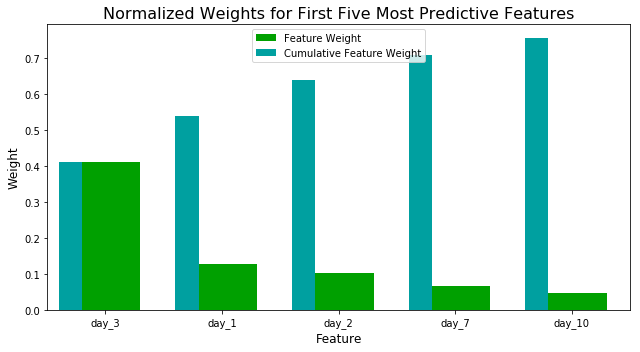

In [18]:
# Import the supervised learning model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the supervised model on the training set
model = RandomForestRegressor().fit(X_train, np.ravel(y_train_mean))

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train_mean)